In [62]:
# モジュール・ライブラリのインポート（必ず最初に実行）
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'MS Gothic'

# 表記の設定
pd.set_option('display.precision', 3)   # 小数点以下の表示桁
pd.set_option('display.max_rows', 20)  # 表示する行数
pd.set_option('display.max_columns', 10)  # 表示する行数
%precision 3

'%.3f'

In [34]:
# アヤメデータをPandasに読み込む
Iris = pd.read_csv('./Iris.csv')
Iris = Iris.iloc[:, 1:5]
Iris.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# 特性値の活用

量的データが与えられたとき，まず行うべきことはヒストグラムを描いてデータの分布（どの値がどの程度あるか）を把握することである．
その上で，分布形状が単峰性であれば，データから計算した少数の指標によってデータを要約することができる．
このように，データの特性を定量的に表すための指標を**特性値**（あるいは代表値，記述統計量，要約統計量）と呼ぶ．
一般にデータの特性はデータの中心を表す特性値と中心からのばらつきを表す特性値によって要約される．

※ データの分布形状が多峰性の場合に中心＋ばらつきのように少数の指標で要約すると，データの特性をうまく表すことができないので注意する．

## データの中心を表す特性値

### 算術平均（相加平均）

データの中心を表す特性値として最もよく知られ，よく用いられるのが**算術平均**（相加平均）であり，

$$
	\bar{x} = \frac{x_{1}+x_{2}+\cdots+x_{n}}{n} = \frac{1}{n} \sum_{i=1}^{n}x_{i}
$$(eq:arithmetic_mean)

と定義される．
算術平均は分布形状が左右対称に近いデータの場合にデータの中心を表す量として適切である．
しかし，分布形状が極端に非対称な場合には，大きな値を持つ少数のデータが平均値を押し上げてしまうため，データの中心を表す特性値としてふさわしくない．

**Pythonによる実装**

まずは[Iris Dataset](https://drive.google.com/uc?export=download&id=1dmRM6SiafHEkCH_c7G0KHmt_IISqKrWN)を読み込んでおく．
このデータに対し，式{eq}`eq:arithmetic_mean`を当てはめれば算術平均を計算することができる．
例えば，アヤメのがく片の幅（Sepal Width）のデータの場合，平均値は $ \bar{x}=3.054 $ cm，アヤメの花弁の幅（Petal Width）のデータの場合，平均値は $ \bar{x}=1.199 $ cmとなる．

In [35]:
# アヤメのがく片の長さの平均（Pandasのmeanメソッドを用いる）
print('がく片の幅の平均', Iris['Sepal Width'].mean())
print('花弁の幅の平均', Iris['Petal Width'].mean())

がく片の幅の平均 3.0540000000000003
花弁の幅の平均 1.1986666666666668


以下はがく片の幅（Sepal Width）と花弁の幅（Petal Width）の平均値をヒストグラム上に示した図である．
がく片の幅についてはヒストグラムが単峰性で左右対称となるため，平均値がデータの中心にほぼ一致していることが分かる．
一方，花弁の幅についてはヒストグラムが双峰性となるため，平均値だけを見るとデータの特性を見誤る恐れがある．
このような場合を想定し，データが与えられたらまずはヒストグラムを確認することが重要である．


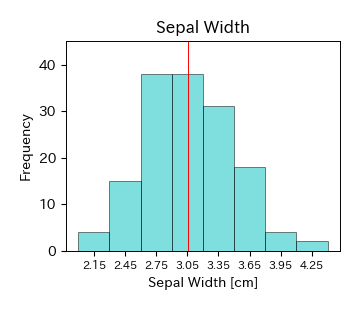

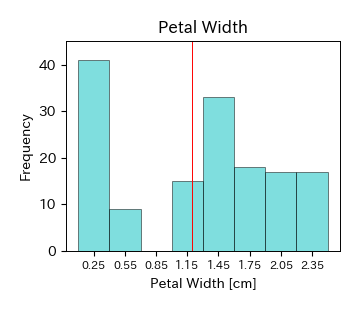

In [17]:
# ビンの個数（スタージェスの公式）
bn = int(1+np.log2(len(Iris)))

# ヒストグラムの描画と保存
for i in ['Sepal Width', 'Petal Width']:
    fig, ax = plt.subplots(figsize=(3.5, 3), dpi=100)

    # 平均値の位置
    ave = Iris[i].mean()
    ax.plot([ave, ave], [0, 100], 'r-')
    
    x = ax.hist(Iris[i], # データ
                bins=int(bn), # 階級数
                histtype='bar',  # ヒストグラムの種類
                color='c', ec='k', alpha=0.5  # 縦棒の色，透明度
               )[1]
    x2 = np.round(0.5*(x[1:]+x[:-1]), 2)  # 横軸に表示する階級値（中央値）
    
    ax.set_title(i)  # グラフのタイトル
    ax.set_xticks(x2) # 横軸の目盛り
    ax.set_xticklabels(x2, fontsize=8) # 横軸の目盛り
    ax.set_xlabel(i+' [cm]')  # 横軸のラベル
    ax.set_ylabel('Frequency') # 縦軸のラベル
    ax.set_ylim(0, 45)

### 幾何平均（相乗平均）

算術平均は平均の計算方法として最も一般的であるが，それ以外の方法もある．
それが**幾何平均**（相乗平均）である．
幾何平均は，$ n $個のデータに対して，全ての値の積の$ n $乗根をとったもので，

$$
	\bar{x}_{g} = \sqrt[n]{x_{1}\times\cdots \times x_{n}} = \sqrt[n]{\prod_{i=1}^{n}x_{i}} = \left(\prod_{i=1}^{n}x_{i}\right)^{1/n}
$$(eq:geometric_mean)

と定義される．
ルートを取っているので，幾何平均は正の数のみしか扱えず，さらに掛け算によって定義されるので比率データにしか適用できない．

幾何平均は成長率や倍率の平均を計算するときに用いられる．
例えば，次のような事例を考える：

> 1年目から2年目にかけての物価は対前年比2倍になり（100円のものが200円になり），2年目から3年目にかけての物価は対前年比8倍となった（200円のものが1600円になった）．
>では，この2年間の物価の対前年比伸び率の平均はいくらか？

まず，算術平均を適用してみる．
すると，物価の対前年比伸び率の平均は$ (2+8)/2=5 $倍となる．
これは，1年目に100円だったものが2年目に500円になり，さらに3年目に2500円になることを意味するので，実際よりも過大に見積もってしまう．
そこで，次に幾何平均を適用してみる．
すると，物価の対前年比伸び率の平均は$ \sqrt[2]{2\times 8}=4 $倍となる．
これは，1年目に100円だったものが2年目に400円になり，さらに3年目に1600円になることを意味するので，実際の金額と一致する．
このように，倍率の平均値を計算する場合には，算術平均ではなく幾何平均を用いるのが妥当である．

**Pythonによる実装**

幾何平均の定義をそのまま適用すると，全データの積を計算する必要がありその結果が巨大な数となる可能性がある．
この場合，オーバーフローを起こすことがあるので，以下のように対数を取ってから算術平均を計算し，最後に元に戻すとうまくいく．

In [36]:
x = np.log(Iris['Sepal Length'])
np.exp(np.sum(x)/len(x))

5.786

以下のように`scipy`を使う方法もある．

In [37]:
from scipy.stats.mstats import gmean
gmean(Iris['Sepal Length'])

5.786

### 中央値

データの分布形状が単峰性であっても左右非対称である場合，算術平均はデータの中心を表す特性値としてふさわしくない．
例えば，

$$
	1,1,1,1,2,3,4,5,16,20 
$$

のようなデータがあったとき，この算術平均は5.4になるが，平均より小さいものが8個を占め，残りの2個が平均より大きい．
これは，少数のデータ（16と20）が平均を押し上げている例である．
このような場合，データの中心という意味では既に述べた**中央値**（メディアン）を用いる方が適切である．
実際，中央値を用いれば，その値より小さい数と大きい数の個数が等しくなる．

**Pythonによる実装**

In [38]:
# 最頻値の計算（Pandasのmedianメソッドを用いる）
Iris['Sepal Length'].median()

5.800

### 最頻値

平均値，中央値の他によく用いられる特性値として，**最頻値**（モード）がある．
これは，データの中で最も頻出する数であり，度数分布において度数が最大となる階級の階級値に対応する．
分布形状が単峰性で左右非対称な場合には，データの中心を表す特性値としてよく用いられる．
ただし，分布形状が双峰性の場合には有効な特性値とならないので注意が必要である．

**Pythonによる実装**

In [39]:
# 最頻値の計算（Pandasのmodeメソッドを用いる）
Iris['Sepal Length'].mode()

0    5.0
Name: Sepal Length, dtype: float64

## データのばらつきを表す特性値

データの特性を知りたい場合，中心を表す特性値だけでは情報不足であり，中心からどの程度ばらついているかも考慮しなければならない．
例えば，以下の3つのデータは中心を表す算術平均，中央値，最頻値がすべて5であるが，分布の形状は異なる．

In [40]:
# 3つのデータを作成
x_A = np.array([0,3,3,5,5,5,5,7,7,10])
x_B = np.array([0,1,2,3,5,5,7,8,9,10])
x_C = np.array([3,4,4,5,5,5,5,6,6,7])

In [41]:
# 各データの平均値，中央値，最頻値を求める
import statistics as stats
print(np.mean(x_A), np.median(x_A), stats.mode(x_A))
print(np.mean(x_B), np.median(x_B), stats.mode(x_B))
print(np.mean(x_C), np.median(x_C), stats.mode(x_C))

5.0 5.0 5
5.0 5.0 5
5.0 5.0 5


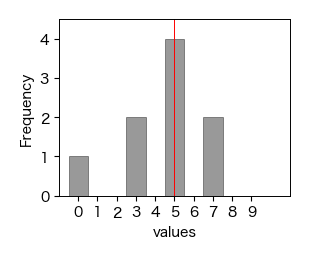

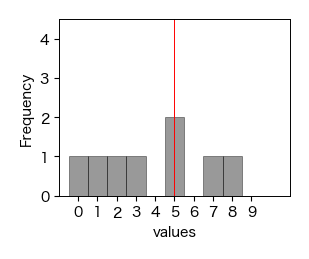

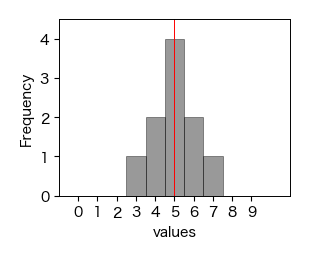

In [42]:
# 各データのヒストグラムを描く
for x in [x_A, x_B, x_C]:
    fig, ax = plt.subplots(figsize=(3, 2.5))
    ax.plot([5, 5], [0, 100], 'r-')
    ax.hist(x, bins=np.arange(len(x_A))-0.5, color='k', ec='k', alpha=0.4)
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_xlim(-1, 11); ax.set_ylim(0, 4.5);
    ax.set(xlabel='values', ylabel='Frequency')

通常，ばらつきを求める際には，算術平均と各データとの差$ x_{i} - \bar{x} $を考える．
これを**偏差**と呼ぶ．
この偏差を全データに対して平均すれば，ばらつきを表す特性値になりそうであるが，これだと問題が生じる．
例えば，データが左右対称に分布している場合，平均より小さい値のデータ（偏差が負）と大きい値のデータ（偏差が正）が同程度あるため，偏差を平均するとほぼ0になってしまう．
ばらつきが0というのは明らかにおかしいため，別の特性値を考える必要がある．
以下に代表的な方法を説明する．

### 平均偏差

１つ目の方法は偏差の絶対値を取ってから平均するという方法であり，**平均偏差**と呼ばれる：

$$
	平均偏差 = \frac{1}{n} \sum_{i=1}^{n}|x_{i}-\bar{x}| 
$$(eq:mean_deviation)

これは，$ n $個のデータの偏差の絶対値を平均した値であり，ばらつきの指標として直感的に理解しやすい．
しかし，絶対値の扱いが数学的に面倒であるため（例えば微分が面倒），利用されることは少ない．

**Pythonによる実装**

In [43]:
print(np.fabs(x_A - x_A.mean()).mean())
print(np.fabs(x_B - x_B.mean()).mean())
print(np.fabs(x_C - x_C.mean()).mean())

1.8
2.8
0.8


### 分散・標準偏差

２つ目の方法は，偏差を２乗してから平均するという方法であり，**分散**と呼ばれる：

$$
	s^{2} = \frac{1}{n} \sum_{i=1}^{n} (x_{i} - \bar{x})^{2}
$$(eq:deviation)

また，分散の平方根$ s $は**標準偏差**と呼ばれる：

$$
	s = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{i} - \bar{x})^{2}}
$$(eq:standard_deviation)

標準偏差はデータの測定単位と同一の単位となるので，データのばらつきを表す場合は分散よりも直感的に理解しやすい．
また，平均偏差のように絶対値を取る場合などに比べて数学的に扱いやすい（例えば微分がしやすい）という特徴がある．
ただし，分散・標準偏差は平均値から大きく離れたデータほど寄与が大きくなるため，外れ値の影響を大きく受けるという問題もある．

通常，データのばらつきを表す特性値としては分散または標準偏差が最もよく用いられる．
特に，データの分布が単峰性で左右対称な場合，データの中心（算術平均）と中心からのばらつきを

$$
	\bar{x} \pm s
$$

のように表す．

**分散公式**

分散について，以下の公式が知られている：

$$
    s^{2} = \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \bar{x}^{2} = \overline{x^{2}} - \bar{x}^2
$$(eq:deviation2)

分散（または標準偏差）を求める際には，定義式{eq}`eq:deviation`を用いるよりもこの公式を用いた方が計算が楽である．

```{admonition} 証明
:class: dropdown
以下のように分散の定義式{eq}`eq:deviation`を変形することで直ちに得られる：

\begin{align*}
    s^{2} 
    &= \frac{1}{n} \sum_{i=1}^{n} (x_{i}^{2} - 2x_{i}\bar{x} + \bar{x}^{2})\\
    &= \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \frac{1}{n} \sum_{i=1}^{n} 2x_{i}\bar{x} + \frac{1}{n} \sum_{i=1}^{n} \bar{x}^{2} \\
    &= \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - 2\bar{x} \frac{1}{n} \sum_{i=1}^{n}x_{i} + \frac{1}{n}\bar{x}^{2} \sum_{i=1}^{n} 1\\
    &= \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - 2\bar{x}\bar{x}  + \frac{1}{n}\bar{x}^{2} n\\
    &= \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - 2\bar{x}^{2}  + \bar{x}^{2}\\
    &= \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \bar{x}^{2}
\end{align*}

```

**Pythonによる実装**

In [44]:
# 分散（numpyのvar関数を用いる）
print(np.var(x_A))
print(np.var(x_B))
print(np.var(x_C))

6.6
10.8
1.2


In [45]:
# 分散（Pandasを用いる）
Iris['Sepal Length'].var()

0.686

In [46]:
# 標準偏差（numpyのstd関数を用いる）
print(np.std(x_A))
print(np.std(x_B))
print(np.std(x_C))

2.569046515733026
3.286335345030997
1.0954451150103321


In [47]:
# 標準偏差（Pandasを用いる）
Iris['Sepal Length'].std()

0.828

### 変動係数

ある集団の身長のデータをcm単位で測定したところ，平均値が約170cm，標準偏差が約6cmであったとする．
このデータに対し，身長の単位をmで表すと，平均値は1.7m，標準偏差は0.06mとなる．
このように，標準偏差は測定単位によって値が変化してしまう．
また，標準偏差はデータの水準の変化（おおまかには平均値の大きさ）によっても大きさが変化する．
例えば，990点満点の英語の某テストの場合，ある回の平均点は575点，標準偏差は167点となり，人間の身長の場合よりも大きくなる．
これは，テストの点数のばらつき（標準偏差）が大きいというだけでなく，そもそもデータの水準（平均値）が身長の場合より大きいことが原因である．

以上のように単位やデータの水準が異なる場合でも，データの分布形状がよく似ていれば平均値からのばらつきの程度を同じ指標で比較することが可能である．
このためには，以下で定義される**変動係数**（Coefficient of Variation）を用いる：

$$
	\mathrm{CV} = \frac{s}{\bar{x}}
$$(eq:cv)

変動係数はデータの標準偏差を平均値で割った量である．
同じ単位を持つ量同士で割り算をしているので，無次元（単位がない）となり，データの測定単位に依らない．
また，データの水準を表す平均値で割っているので，データの水準にも依らない．
よって，通常，単位や平均値が異なるグループ間でばらつきを比較する際には変動係数がよく用いられる．

実際に，身長とテストの点数の場合に変動係数を求めると以下のようになる：

\begin{align*}
	身長：CV &= 6/170 = 0.035 \\
	英語のテスト：CV &= 167/575 = 0.29 
\end{align*}

この場合，身長の変動係数よりも英語のテストの変動係数の方が10倍近く大きくなっている．
すなわち，身長のデータのばらつきよりも英語のテストのばらつきの方が大きいことが分かる．

**Pythonによる実装**

In [48]:
print(np.std(x_A)/np.mean(x_A))
print(np.std(x_B)/np.mean(x_B))
print(np.std(x_C)/np.mean(x_C))

0.5138093031466051
0.6572670690061994
0.21908902300206642


### 四分位範囲

前節の五数要約の所で説明した**四分位範囲**もデータのばらつきを表す特性値である．
四分位範囲はデータの第３四分位数$Q_{3}$と第1四分位数$Q_{1}$の差

$$
Q_{3}-Q_{1}
$$

として定義される．
定義より，データの中心から極端に外れた値（外れ値）は除外されるため，外れ値の影響を受けにくいという利点がある．
しかし，数学的には扱いにくい．

**Pythonによる実装**

In [49]:
# 最小値，第1四分位数，中央値，第3四分位数，最大値
Q = np.percentile(Iris['Sepal Length'], q=[0, 25, 50, 75, 100])

# 四分位範囲
Q[3] - Q[1]

1.300

## ローレンツ曲線とジニ係数

### ローレンツ曲線

ある集団を構成するメンバー（人物でも市町村でも何でも良い）に対し，ある量（所得や人口など）が対応したデータを考える．
以下では，具体例として，各人物に対して所得が対応したデータを考える．

まず，各人物を所得の小さい順に並べて$ n $個の階級に等分する．
その上で，下から$ i $番目の階級の度数（人数）を$ x_{i} $，累積相対度数を$ X_{i} $とする．
ここで，累積相対度数$ X_{i} $とは，下から$ i $までの階級に属する人物が全体に占める比率である．
同様にして，階級$ i $の平均所得を$ y_{i} $，平均所得の累積相対度数（累積比率）を$ Y_{i} $とする．
この場合，$ Y_{i} $は下から$ i $までの階級の平均所得が全体に占める比率となる．

例えば，100人の集団を4つの階級（$n=4$）に等分した場合は以下のようになる（所得は適当に設定している）．

In [50]:
x = np.array([25, 25, 25, 25])
X = np.cumsum(x) / np.sum(x)
y = np.array([150, 250, 400, 800])
Y = np.cumsum(y) / np.sum(y)

In [51]:
pd.DataFrame(np.c_[x, X, y, Y],
             columns=['度数x', '累積相対度数X', '平均所得y', '平均所得の累積相対度数Y'],
             index=[1,2,3,4])

,度数x,累積相対度数X,平均所得y,平均所得の累積相対度数Y
1,25.0,0.25,150.0,0.094
2,25.0,0.50,250.0,0.250
3,25.0,0.75,400.0,0.500
4,25.0,1.00,800.0,1.000


次に，横軸に階級の累積相対度数$ X_{i} $，縦軸に平均所得の累積相対度数$ Y_{i} $を取ったグラフを考える．
これを**ローレンツ曲線**と呼ぶ．
ローレンツ曲線の横軸，縦軸は（比率なので）0から1の範囲であり，必ず両端が$ (0, 0) $と$ (1, 1) $の折れ線グラフとなる．
ローレンツ曲線上の$ (X, Y) $という点は，集団全体の貧しい側から$ X\times100 $\%の人が全体の$ Y\times100 $\%の所得を占めることを表す．
例えば，$ (0.25, 0.1) $という点は，集団全体の25\%の人が10\%の富を占めるということを表す．
もし，所得が全人物に平等に配分されている場合，ローレンツ曲線は傾き1の直線となり，これを**完全平等線**と呼ぶ．
一方，所得の配分に格差があるほどローレンツ曲線は完全平等線から下にずれていく．
このように，ローレンツ曲線はある集団における所得の配分格差を可視化したグラフといえる．

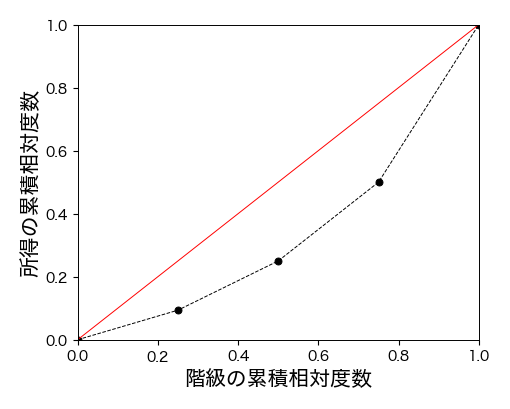

In [52]:
fig, ax = plt.subplots(figsize=(5, 4))

X2 = np.append(0, X)
Y2 = np.append(0, Y)
ax.plot(X2, Y2, 'o--')
ax.plot([0, 1], [0, 1], '-')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(u'階級の累積相対度数', fontsize=15)
ax.set_ylabel(u'所得の累積相対度数', fontsize=15);
fig.savefig('./lorentz.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

### ジニ係数

集団の格差の度合いはローレンツ曲線が完全平等線から下にずれるほど大きくなる．
よって，ローレンツ曲線と完全平等線によって囲まれた部分の面積が，完全平等線，$ x=1 $，$ y=0 $で構成される三角形の面積に占め比率を格差の指標と考えることができる．
この指標は**ジニ係数**と呼ばれ，$G$と表す．

**（参考）ジニ係数を求める公式**

階級を$ n $等分したとき，下から$ i $番目の階級の平均所得を$ y_{i} $とする（$ y_{1}\leq y_{2} \leq \cdots \leq y_{n} $）．
このとき，ジニ係数を以下のように表すことができる：

$$
	G = \frac{1}{2n^{2} \bar{y}} \sum_{i=1}^{n} \sum_{j=1}^{n} |y_{i} - y_{j}|
$$(eq:gini)

ただし，$ \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i} $は全体の平均所得である．
ジニ係数は0から1の間で定義され，完全に平等な配分のときに$ G=0 $，一人がすべての所得を占有しているときに$ G=(n-1)/n $となる（つまり$ n $が大きいときには1に近づく）．

```{admonition} （参考）$ n=3 $ の場合の証明
:class: dropdown

まず，式{eq}`eq:gini`を用いてジニ係数を計算すると，
\begin{align*}
	\bar{y} &= \frac{1}{3} (y_{1}+y_{2}+y_{3}) \\
	\sum_{i=1}^{3}\sum_{j=1}^{3} |y_{i}-y_{j}|
	&= 2\{(y_{2}-y_{1})+(y_{3}-y_{1})+(y_{3}-y_{2})\} \\
	&= 4(y_{3}-y_{1}) 
\end{align*}
より
\begin{align*}
	G &= \frac{2}{3} \frac{y_{3}-y_{1}}{y_{1}+y_{2}+y_{3}}
\end{align*}
となる．

次に，面積からジニ係数を計算する．
ローレンツ曲線の横軸と縦軸の値はそれぞれ{numref}`tb:n=3`のようになる．
ローレンツ曲線と$ x=1 $，$ y=0 $に囲まれた領域の面積は1つの三角形と2つの台形から成るので，

\begin{align*}
	\frac{1}{2}\cdot\frac{1}{3} \left[\alpha_{1}+(\alpha_{1}+\alpha_{2})+(\alpha_{2}+1)\right]
	&= \frac{1}{6}(2\alpha_{1}+2\alpha_{2}+1)
\end{align*}

これより，完全平等線と$ x=1 $，$ y=0 $に囲まれた領域の面積は

\begin{align*}
	\frac{1}{2} - \frac{1}{6}(2\alpha_{1}+2\alpha_{2}+1) = \frac{1}{3} (1-\alpha_{1}-\alpha_{2})
\end{align*}

となるので，ジニ係数は

\begin{align*}
	G 
	&= \frac{1}{3} (1-\alpha_{1}-\alpha_{2}) \div \frac{1}{2} \\
	&= \frac{2}{3} (1-\alpha_{1}-\alpha_{2}) \\
	&= \frac{2}{3} \frac{y_{3}-y_{1}}{y_{1}+y_{2}+y_{3}}
\end{align*}

と求まる．

以上より，式{eq}`eq:gini`から求めたジニ係数と面積から求めたジニ係数が確かに一致することが分かった．
なお，一般の$ n $に対する証明は省略する．

```

```{table} $ n=3 $の場合の度数分布表
:name: tb:n=3
|  階級  | 累積相対度数（横軸） | 所得の累積相対度数（縦軸） |
| :---: | :---: | :---: |
| 1    |  $1/3$ | $\alpha_{1}=\frac{y_{1}}{y_{1}+y_{2}+y_{3}}$ |
| 2   | $2/3$ | $\alpha_{1}=\frac{y_{1}+y_{2}}{y_{1}+y_{2}+y_{3}}$ |
| 3  | $1$ | 1 |
```

**Pythonによる実装**

In [53]:
# 面積から求める
S1 = 0.5  # 完全平等選，x軸，y軸で囲まれた三角形の面積
S2 = 0    # ローレンツ曲線，x軸，y軸で囲まれた面積
for (a, b, h) in zip(Y2[:-1], Y2[1:], np.diff(X2)):
    S2 += (a+b)*h/2
G = (S1 - S2) / S1
G

0.328

In [54]:
# 公式から求める
G = np.fabs(np.add.outer(y, -y)).sum() / np.mean(y) / 2 / len(y)**2
G

0.328

## 実例：地域の豊かさの格差は拡大しているか？

### STEP1: Problem

- 2015年の国勢調査では，日本全体の人口が1920年の調査開始以来，初めて減少したことが明らかになった．
- また，都道府県ごとの人口を見ても，5年前（2010年）に比べて人口が減少したのは39の道府県にのぼる．
- 一方，東京を中心とした大都市には人口が集中し，都市部と地方の格差が広がっているのも事実である．
- 人口は経済・社会の基盤を成すものであり，人口の増減は経済的な豊かさと密接に関わっていると思われる．
- 近年の人口変動によって，地域間で経済的な豊かさの格差は拡大したのだろうか？

### STEP2: Plan

- 地域ごとの経済的な豊かさを捉える指標として，都道府県別の1人当たり県民所得に着目する．
- これは，企業を含めて県民全体の経済水準を表すもので，都道府県間で比較可能な統計データである．
- ただし，各都道府県は人口規模が大きく異るので，地域ごとに比較する際は規模を表す人口等の変数で割った量を用いることが必要となる．
- そこで，今回用いる1人当たり県民所得は，県民所得を県内に居住する人口（「国勢調査」と「人口推計」に準拠）で割って求める．
- また，格差の大きさは一人当たり県民所得の標準偏差，変動係数，ジニ係数で評価し，ばらつきが40年間で拡大しているか否かを調べる．

### STEP3: Data

- [1人当たり県民所得のデータ](https://drive.google.com/uc?export=download&id=1dsA-HFOtttRLpa1RD8FhdaThv_gmgRyF)をダウンロードし，Pandasで読み込め
  - このデータは内閣府[県民経済計算](https://www.esri.cao.go.jp/jp/sna/data/data_list/kenmin/files/files_kenmin.html) を基に作成している．
  - ただし，年度が同じでも基準（平成23年基準や平成17年基準など）によって算出された値が異なる．
  - そこで，異なる基準のデータが適切に接続するように，一部推定値を用いている．
- 読み込んだ所得のデータは単位が千円になっているので，万円に直せ．

In [55]:
PI = pd.read_csv('prefectural_income.csv', index_col='p')
PI.columns = PI.columns.astype(int)
PI = np.round(PI/10, 0)  # 単位を万円に変換
PI

,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018
p,,,,,,,,,,,
hokkaido,106.0,120.0,135.0,146.0,159.0,...,251.0,261.0,262.0,269.0,274.0
aomori,85.0,93.0,102.0,114.0,122.0,...,240.0,254.0,257.0,251.0,251.0
iwate,84.0,92.0,106.0,120.0,126.0,...,259.0,267.0,268.0,278.0,284.0
miyagi,102.0,111.0,124.0,135.0,142.0,...,276.0,292.0,289.0,294.0,294.0
akita,93.0,103.0,115.0,122.0,127.0,...,240.0,249.0,256.0,270.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...
kumamoto,94.0,105.0,115.0,125.0,134.0,...,235.0,242.0,253.0,265.0,267.0
oita,87.0,97.0,110.0,122.0,130.0,...,246.0,261.0,259.0,269.0,271.0
miyazaki,82.0,90.0,102.0,114.0,120.0,...,224.0,232.0,239.0,245.0,247.0


### STEP4: Analysis

**実習：平均と標準偏差**
- 各年度に対して1人あたり県民所得の平均と標準偏差を求め，時系列変化を同じグラフ上にプロットせよ．
- 1975年〜91年の標準偏差は一貫して増加しており，格差は拡大しているように見えるが，本当にそう言えるか？標準偏差の特徴を踏まえた上で平均値の変化と関連付けて考えよ．

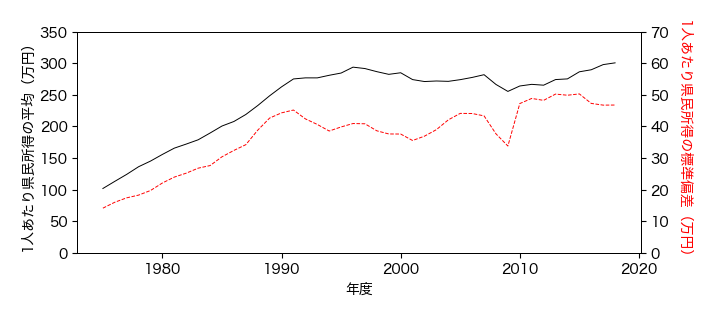

In [56]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlabel('年度')

# 1人あたり県民所得の平均
ax.plot(PI.columns, PI.mean())
ax.set_ylim(0, 350)
ax.set_ylabel('1人あたり県民所得の平均（万円）')

# 1人あたり県民所得の標準偏差
ax2 = ax.twinx()
ax2.plot(PI.columns, PI.std(), 'r--')
ax2.set_ylim(0, 70)
ax2.set_ylabel('1人あたり県民所得の標準偏差（万円）', color='r', rotation=270, labelpad=15)

# 保存
fig.savefig('./ave_std.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300)

**実習：変動係数**
- 全年度に対して1人あたり県民所得の標準偏差と変動係数を求め，時系列変化を同じグラフ上にプロットせよ．
- 変動係数の変化から，1975年〜91年および全期間にかけて格差が増加しているか考えよ．

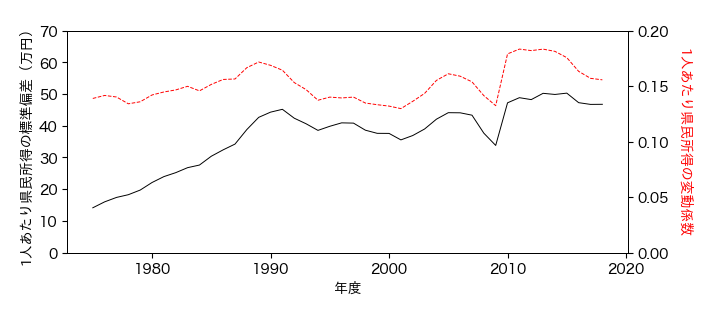

In [57]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlabel('年度', fontname='IPAexGothic')

# 1人あたり県民所得の標準偏差
ax.plot(PI.columns, PI.std(), 'k-')
ax.set_ylim(0, 70)
ax.set_ylabel('1人あたり県民所得の標準偏差（万円）', fontname='IPAexGothic')

# 1人あたり県民所得の変動係数
ax2 = ax.twinx()
ax2.plot(PI.columns, PI.std()/PI.mean(), 'r--')
ax2.set_ylim(0, 0.2)
ax2.set_ylabel('1人あたり県民所得の変動係数', fontname='IPAexGothic', color='r', rotation=270, labelpad=15)

fig.savefig('./std_cv.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300)

**実習：ローレンツ曲線，ジニ係数**
- 年度を１つ選び，その年度のローレンツ曲線とジニ係数を求めよ．
- 全年度に対してジニ係数を求め，時系列変化を可視化せよ．
- ジニ係数の変化から，1975年〜91年および全期間にかけて格差が増加しているか考えよ．

2013年度のローレンツ曲線とジニ係数

In [58]:
x = np.ones(47)
X = np.cumsum(x) / np.sum(x)
y = np.sort(PI[2013])
Y = np.cumsum(y) / np.sum(y)
X2 = np.append(0, X)
Y2 = np.append(0, Y)

g = np.fabs(np.add.outer(y, -y)).sum() / np.mean(y) / 2 / len(y)**2
print(g)

0.08075059652462442


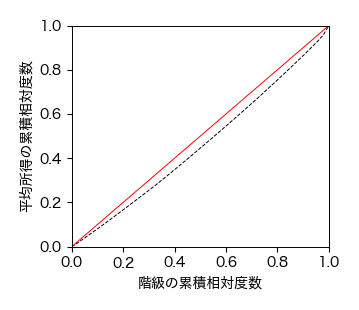

In [59]:
fig, ax = plt.subplots()

ax.plot(X2, Y2, '--')
ax.plot([0, 1], [0, 1], '-')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(u'階級の累積相対度数')
ax.set_ylabel(u'平均所得の累積相対度数')

fig.savefig('./lorenz_curve.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300)

ジニ係数の時間変化

In [60]:
# ジニ係数の計算（公式を使う）
G = []
for t in PI.columns:
    x = np.ones(47)
    X = np.cumsum(x) / np.sum(x)
    y = np.sort(PI[t])
    Y = np.cumsum(y) / np.sum(y)

    g = np.fabs(np.add.outer(y, -y)).sum() / np.mean(y) / 2 / len(y)**2
    G.append(g)

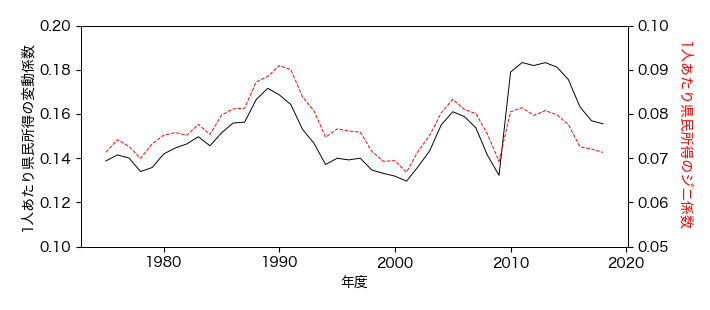

In [61]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlabel('年度')

# 1人あたり県民所得の変動係数
ax.plot(PI.columns, PI.std()/PI.mean(), 'k', label='変動係数')
ax.set_ylim(0.1, 0.2)
ax.set_ylabel('1人あたり県民所得の変動係数')

# ジニ係数
ax2 = ax.twinx()
ax2.plot(PI.columns, np.array(G), 'r--', label='ジニ係数')
ax2.set_ylim(0.05, 0.1)
ax2.set_ylabel('1人あたり県民所得のジニ係数', color='r', rotation=270, labelpad=15)

# 保存
fig.savefig('./gini.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300)

### STEP 5: Conclusion

- 格差を表す指標の40年間の推移から地域間で経済的な豊かさの格差が拡大したのかどうか考えよ．
- 格差を表す指標の40年間の推移を見ると，細かい時間スケールでの変動が見られる．これらは具体的にどのような出来事を反映していると考えられるか？
- 2023年現在のデータを使用すると，どのような変化が観られるか？